In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
import matplotlib
import matplotlib.pyplot as plt

In [7]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28, 28)  # Reshape it to plot it

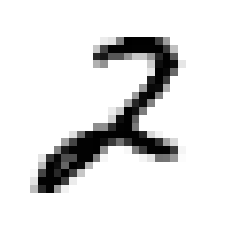

In [8]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [9]:
y[36000]

'9'

In [10]:
x_train = x[:60000]
x_test = x[60000:]

In [11]:
y_train = y[:60000]
y_test = y[60000:]

In [12]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# Creating a 2 Detector

In [13]:
import numpy as np
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [14]:
y_test_2

array([False,  True, False, ..., False, False, False])

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression(tol = 0.1)

In [17]:
clf.fit(x_train, y_train_2)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [18]:
clf.predict([some_digit])

array([ True])

In [19]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv = 3, scoring = 'accuracy')

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [20]:
a.mean()

0.9782166666666666

In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv = 3)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [22]:
y_train_pred

array([False, False, False, ..., False, False, False])

##  Calculating confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_train_2, y_train_pred)

array([[53564,   478],
       [  829,  5129]], dtype=int64)

In [25]:
confusion_matrix(y_train_2, y_train_2) # Confusion Matrix for perfect prediction

array([[54042,     0],
       [    0,  5958]], dtype=int64)

## Precision and Recall

In [27]:
from sklearn.metrics import precision_score, recall_score

In [28]:
precision_score(y_train_2, y_train_pred)

0.9147494203673979

In [29]:
recall_score(y_train_2, y_train_pred)

0.8608593487747567

## F1 Score

In [30]:
from sklearn.metrics import f1_score

In [31]:
f1_score(y_train_2, y_train_pred)

0.8869865974924342

## Precision Recall Curve

In [32]:
from sklearn.metrics import precision_recall_curve

In [33]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv = 3, method = 'decision_function')

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [34]:
y_scores

array([ -8.97875876,  -3.93472165, -12.4966344 , ...,  -9.4547747 ,
        -0.11809049,  -6.12735418])

In [35]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [36]:
precisions

array([0.10025408, 0.10023894, 0.10024063, ..., 1.        , 1.        ,
       1.        ])

In [37]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [38]:
thresholds

array([-26.7196047 , -26.70793269, -26.69168386, ...,  18.52321873,
        19.24022742,  19.2795958 ])

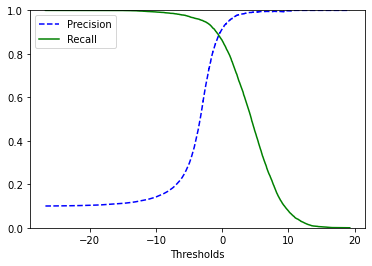

In [42]:
plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Thresholds')
plt.legend(loc = 'upper left')
plt.ylim([0,1])
plt.show()